# Coursework - Practical Project


Data visualization on Earthquake dataset to analyse the dataset and address various search questions

In [77]:
# Importing required liberaries.

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot, plot

In [78]:
# Importing the dataset.

df_input = pd.read_csv("input_features.csv")
target = pd.read_csv("target_values.csv")

In [79]:
# Merge feature and target variables.

merged_data = pd.merge(df_input,target, on= 'building_id', how='left')
merged_data.head(5)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [80]:
# Finding the number of rows and the number of columns in datas

merged_data.shape

(260601, 40)

In [81]:
# Top 5 rows
merged_data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [82]:
# Data types
merged_data.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

In [83]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [84]:
# check for null values
merged_data.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [85]:
notnull_cols=["geo_level_1_id","geo_level_2_id","geo_level_2=3_id","age","height_percentage","area_percentage","count_floors_pre_eq","count_families"]

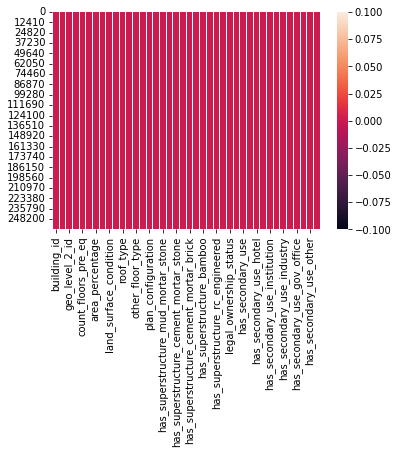

In [86]:
sns.heatmap(merged_data.isnull(), cbar=True)

In [87]:
(merged_data == 0).sum(axis=0)

building_id                                    0
geo_level_1_id                              4011
geo_level_2_id                                38
geo_level_3_id                                 2
count_floors_pre_eq                            0
age                                        26041
area_percentage                                0
height_percentage                              0
land_surface_condition                         0
foundation_type                                0
roof_type                                      0
ground_floor_type                              0
other_floor_type                               0
position                                       0
plan_configuration                             0
has_superstructure_adobe_mud              237500
has_superstructure_mud_mortar_stone        62040
has_superstructure_stone_flag             251654
has_superstructure_cement_mortar_stone    255849
has_superstructure_mud_mortar_brick       242840
has_superstructure_c

In [88]:
cols=["age","height_percentage","area_percentage","count_floors_pre_eq","count_families"]

Distribution of damage accross damage levels:-

In [89]:
print("\n Description of dataset")
merged_data[cols].describe().T


 Description of dataset


,count,mean,std,min,25%,50%,75%,max
age,260601.0,26.535029,73.565937,0.0,10.0,15.0,30.0,995.0
height_percentage,260601.0,5.434365,1.918418,2.0,4.0,5.0,6.0,32.0
area_percentage,260601.0,8.018051,4.392231,1.0,5.0,7.0,9.0,100.0
count_floors_pre_eq,260601.0,2.129723,0.727665,1.0,2.0,2.0,2.0,9.0
count_families,260601.0,0.983949,0.418389,0.0,1.0,1.0,1.0,9.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



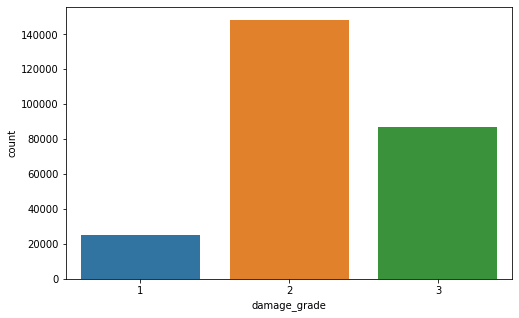

In [90]:

plt.figure(figsize=(8 ,5))
ax = sns.countplot("damage_grade", data=merged_data)

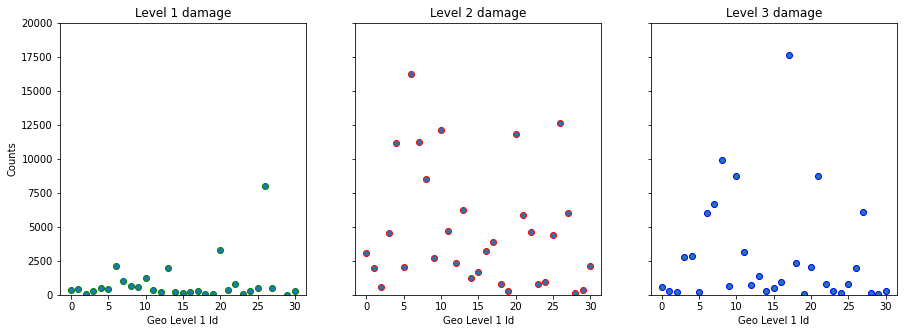

In [91]:
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,5), sharex=True, sharey=True)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,5), sharex=True, sharey=True)
# fig, (ax4, ax5, ax6) = plt.subplots(1, 3, figsize = (15,5), sharex=True, sharey=True)

ax1.set_title("Level 1 damage")
ax1.set_xlabel("Geo Level 1 Id")
ax1.set_ylabel("Counts")
ax1.set_ylim(top = 20000)
ax1.scatter(merged_data[merged_data['damage_grade'] == 1]['geo_level_1_id'].value_counts().index, merged_data[merged_data['damage_grade'] == 1]['geo_level_1_id'].value_counts().values, edgecolors='g')

ax2.set_title("Level 2 damage")
ax2.set_xlabel("Geo Level 1 Id")
ax2.scatter(merged_data[merged_data['damage_grade'] == 2]['geo_level_1_id'].value_counts().index, merged_data[merged_data['damage_grade'] == 2]['geo_level_1_id'].value_counts().values, edgecolors='r')

ax3.set_title("Level 3 damage")
ax3.set_xlabel("Geo Level 1 Id")
ax3.scatter(merged_data[merged_data['damage_grade'] == 3]['geo_level_1_id'].value_counts().index, merged_data[merged_data['damage_grade'] == 3]['geo_level_1_id'].value_counts().values, edgecolors='b')




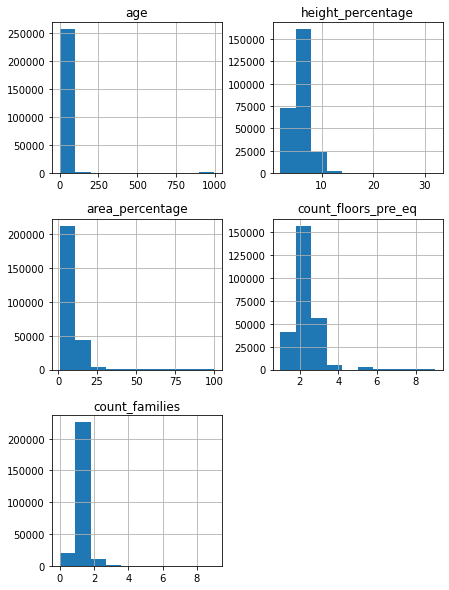

In [92]:
# Histogram of all features.
input1 = merged_data[cols].hist(figsize = (7,10))
plt.show()



Log scaling and Histogram:-

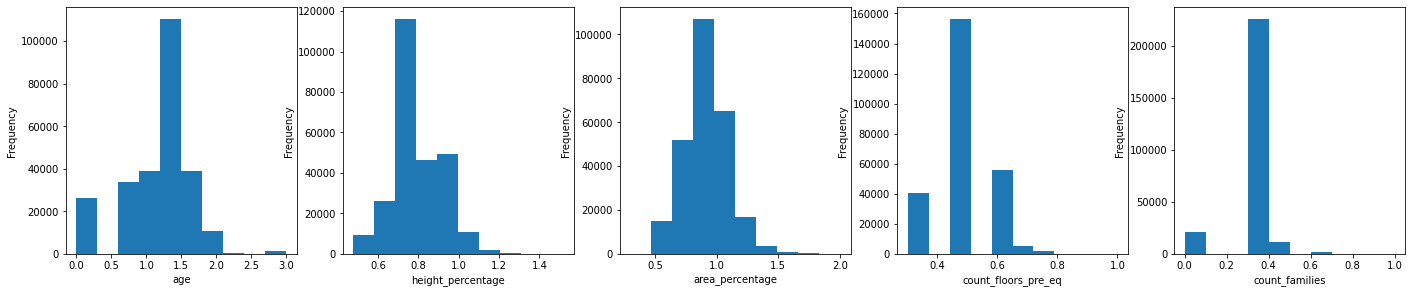

In [93]:
fig = plt.figure(figsize = (24,10))
for j in range(len(cols)):
    var = cols[j]
    transformed = "log_" + var
    merged_data[transformed] = np.log10(merged_data[var]+1)

    sub = fig.add_subplot(2, 5, j + 1)
    sub.set_xlabel(var)
    merged_data[transformed].plot(kind = 'hist')


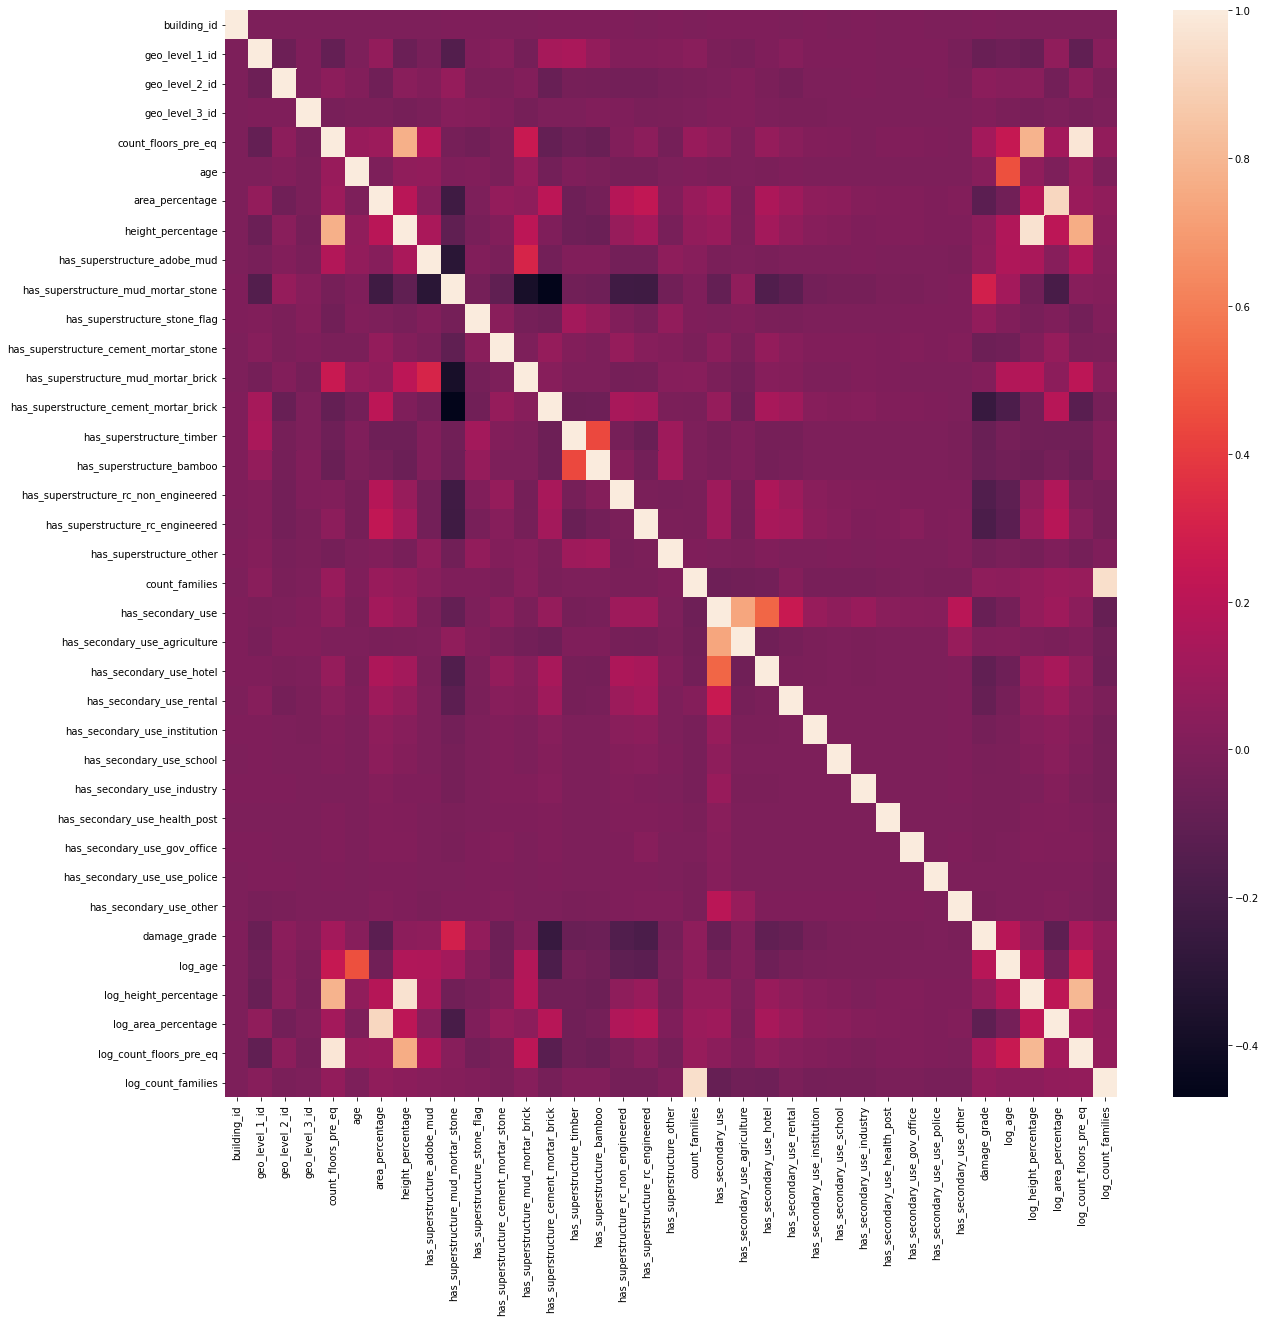

In [94]:
# Correlation matrix between all features.

fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(merged_data.corr())

Outliers detection.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

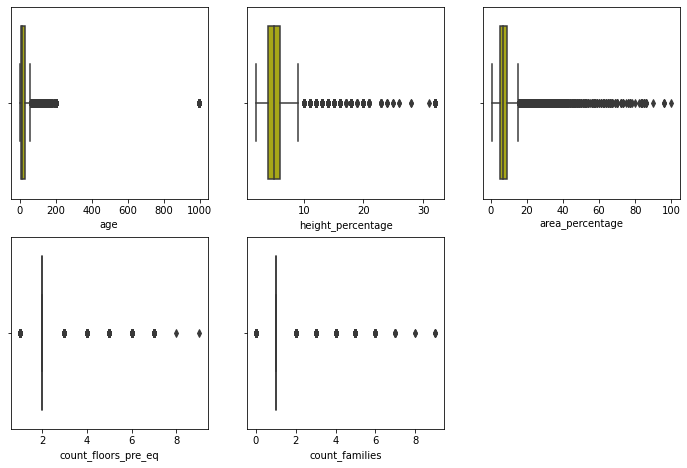

In [95]:
a=1
plt.figure(figsize=(12,12))
for i in cols:
    plt.subplot(3,3,a)
    ax=sns.boxplot(merged_data[i], color='y')
    plt.xlabel(i)
    a+=1
plt.show()

Z score of features.

In [96]:

merged_data[cols].apply(stats.zscore)

,age,height_percentage,area_percentage,count_floors_pre_eq,count_families
0,0.047100,-0.226419,-0.459460,-0.178274,0.038365
1,-0.224765,0.816109,-0.004110,-0.178274,0.038365
2,-0.224765,-0.226419,-0.687135,-0.178274,0.038365
3,-0.224765,-0.226419,-0.459460,-0.178274,0.038365
4,0.047100,1.858636,-0.004110,1.195989,0.038365
...,...,...,...,...,...
260596,0.386932,-1.268946,-0.459460,-1.552536,0.038365
260597,-0.360698,-0.226419,-0.459460,-0.178274,0.038365
260598,0.386932,0.816109,-0.459460,1.195989,0.038365
260599,-0.224765,0.294845,1.361941,-0.178274,0.038365


RQ : What was the percentage of damage for different damage levels that every building constructed with various Superstructures had sustained?

In [97]:
cols2 = [
    "has_superstructure_adobe_mud",
    "has_superstructure_mud_mortar_stone",
    "has_superstructure_stone_flag",
    "has_superstructure_cement_mortar_stone",
    "has_superstructure_mud_mortar_brick",
    "has_superstructure_cement_mortar_brick",
    "has_superstructure_timber",
    "has_superstructure_bamboo",
    "has_superstructure_rc_non_engineered",
    "has_superstructure_rc_engineered",
    "has_superstructure_other",
    "damage_grade",
]

temp_df = merged_data[cols2].copy()

In [98]:
temp_df.head()

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
0,1,1,0,0,0,0,0,0,0,0,0,3
1,0,1,0,0,0,0,0,0,0,0,0,2
2,0,1,0,0,0,0,0,0,0,0,0,3
3,0,1,0,0,0,0,1,1,0,0,0,2
4,1,0,0,0,0,0,0,0,0,0,0,3


In [99]:
temp_df = pd.melt(temp_df, id_vars=["damage_grade"], var_name="building_type")
temp_df = temp_df[temp_df["value"] == 1]
temp_df

,damage_grade,building_type,value
0,3,has_superstructure_adobe_mud,1
4,3,has_superstructure_adobe_mud,1
17,3,has_superstructure_adobe_mud,1
20,2,has_superstructure_adobe_mud,1
29,3,has_superstructure_adobe_mud,1
...,...,...,...
2866496,2,has_superstructure_other,1
2866506,3,has_superstructure_other,1
2866510,2,has_superstructure_other,1
2866533,2,has_superstructure_other,1


In [100]:
temp_df["damage_grade"] = temp_df["damage_grade"].map(
    {1: "low", 2: "medium", 3: "high"}
)
temp_df.head()

,damage_grade,building_type,value
0,high,has_superstructure_adobe_mud,1
4,high,has_superstructure_adobe_mud,1
17,high,has_superstructure_adobe_mud,1
20,medium,has_superstructure_adobe_mud,1
29,high,has_superstructure_adobe_mud,1


In [101]:
df = pd.crosstab(temp_df["building_type"], temp_df["damage_grade"])
df

damage_grade,high,low,medium
building_type,,,
has_superstructure_adobe_mud,8605,594,13902
has_superstructure_bamboo,5314,2839,14001
has_superstructure_cement_mortar_brick,1089,7105,11421
has_superstructure_cement_mortar_stone,675,829,3248
has_superstructure_mud_mortar_brick,5440,623,11698
has_superstructure_mud_mortar_stone,75854,8760,113947
has_superstructure_other,1001,656,2248
has_superstructure_rc_engineered,75,2656,1402
has_superstructure_rc_non_engineered,1410,3857,5832


In [102]:
df = df.apply(lambda x: round(x / df.sum(axis=1) * 100, 2))
df

damage_grade,high,low,medium
building_type,,,
has_superstructure_adobe_mud,37.25,2.57,60.18
has_superstructure_bamboo,23.99,12.81,63.20
has_superstructure_cement_mortar_brick,5.55,36.22,58.23
has_superstructure_cement_mortar_stone,14.20,17.45,68.35
has_superstructure_mud_mortar_brick,30.63,3.51,65.86
has_superstructure_mud_mortar_stone,38.20,4.41,57.39
has_superstructure_other,25.63,16.80,57.57
has_superstructure_rc_engineered,1.81,64.26,33.92
has_superstructure_rc_non_engineered,12.70,34.75,52.55


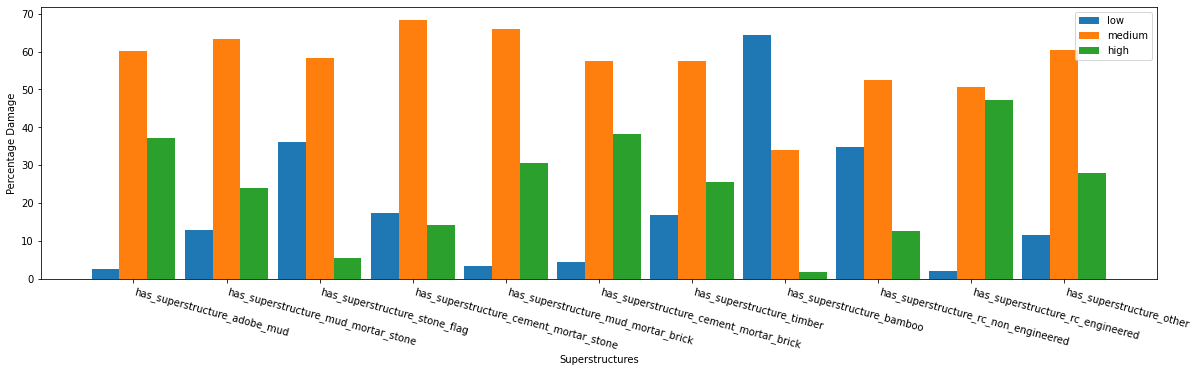

In [103]:
x = np.arange(11)
plt.figure(figsize=(20,5))
plt.bar(x-0.3, height= df["low"], width=0.3)
plt.bar(x, height= df["medium"],width=0.3)
plt.bar(x+0.3, height= df["high"],width=0.3)

plt.xticks(x, cols2, ha="left",rotation=345)
plt.title="Damage By Buildings constructed with Structure Type"
plt.xlabel("Superstructures")
plt.ylabel("Percentage Damage")
plt.legend(["low", "medium", "high"], loc = 'upper right')

plt.show()

RQ : What is the distribution of building age over damage grade, and what is the percentage of damage for age range such as 0-10, 10-15, 15-30 and 30-995? 

In [107]:
merged_data['damage_grade_def'] = np.where(merged_data.damage_grade==1,'(1) Low', 
                                    np.where(merged_data.damage_grade==2,'(2) Medium', 
                                             np.where(merged_data.damage_grade==3,'(3) High',0)))

In [105]:
fig = px.bar(merged_data.groupby(['age','damage_grade_def']).roof_type.count().reset_index().rename(columns={'roof_type':'count'}),
             x="age", y="count", color="damage_grade_def", title="Distribution of the building age over damage grade")
fig.update_xaxes(range=[0, 120])
fig.show()

In [110]:
def draw_subplotted_pie_chart(merged_data ,col, labels, target_col):
    fig = make_subplots(rows=1, cols=4, specs=[[{'type':'domain'}, 
                                                {'type':'domain'},
                                                {'type':'domain'},
                                                {'type':'domain'}]], subplot_titles = labels)
    for i,lb in enumerate(labels):
        labeled = merged_data[merged_data[target_col]==lb]
        counted = pd.DataFrame(labeled.groupby(col)[col].count()).rename(columns={
            col:'Count'}).reset_index()
        fig.add_trace(go.Pie(values=counted.Count, labels=counted[col], name=lb),1,i+1)
    fig.update_layout(title_text= 'Damage grade distribution for different age range')
    iplot(fig)

labels=['0-10','10-15','15-30','30-995']
merged_data['age_range']=pd.qcut(merged_data.age,4,labels=labels)
draw_subplotted_pie_chart(merged_data,'damage_grade_def',labels, 'age_range')